Exercises 1-2 of Climate Modelling Slides

Exercise 1 is an example
Exercise 2 is an independent work

Exercise 1: Linear Energy Balance Model
C(dT/dt) = S0/4(1-ap)-A-BT
where C(dT/dt) is the time evolution of the planet, S0/4 is the solar incoming short-wave radiation, a is the albedo, and A and B are the outgoing long-wave radiation

C=8.36x10^8 JK^-1m^-2, S0=1360 Wm^-2, αp
=0.30, A=-367.58 Wm^-2, B=2.09 Wm^-2K^-1

1) what is the equilibrium temperature for the given values of the parameters? What is the relaxation
time scale (in years)?
2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions;
3) repeat 2) for a few different cases changing the equilibrium temperature and/or the relaxation time
scale, by tuning the appropriate parameters.
4) compute and plot the potential of the model for a few different cases

1) what is the equilibrium temperature for the given values of the parameters? 

    a) Define the equilibrium temperature:
        At equilibrium, the change is 0 so dT/dt = 0
        Set everything on the right-hand side to 0, then solve for T to find the equilibrium temperature
        
        0 = S0/4(1-ap)-A-BT
        BT = S0/4(1-ap)-A
        T = (S0/4(1-ap)-A)/B

    b) Use given parameter values to solve for the equilibrium temperature (code below)

In [ ]:
#heat capacity
C=8.36*10**8
#incoming short-wave radiation
S_zero=1360
#albedo
Ap=0.30
#outgoing long-wave radiation
A=-367.58
B=2.09

#equilibrium temperature equation
eq_temp = ((S_zero/4)*(1-Ap)-A)/B
print(eq_temp)

1) What is the relaxation time scale (in years)?

    a) Define the deviation from the equilibrium:
    
        delta(T) = T-T0
        T=T0 + delta(T)

    c) Plug the difference into the original Energy Balance Model:
    
        C(d(T0+delta(T))/dt) = S0/4(1-ap)-A-B(T0+delta(T))
        The derivative of a constant is 0, so d(T0) cancels
        C(d(T0+delta(T))/dt) = S0/4(1-ap)-A-B(T0+delta(T))

        According to equilibrium temperature S0/4(1-ap)-A-BT = 0, so that also cancels
        C(d(delta(T))/dt) = -B(delta(T))

        Divide by C to get standard form:
        d(delta(T))/dt = -B(delta(T))/C
   
        Change notation to reflect standards in physics:
        B/C = 1/tau0
        tau0 = C/B

In [13]:
#relaxation timescale equation
tau_zero_seconds = C/B

#convert seconds to years
tau_zero = tau_zero_seconds/86400/365
print(tau_zero)

12.683916793505835


2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions

    a) Recall the standard form differential equation: dT/dt = -(T-T0/tau0)
       - This equation says that the rate of change in Temperature is proportional to the distance in temperature from the         equilibrium over the relaxation time, tau

    b) Choose discretisation points for analysis (although time is continuous, choose discrete points on the number line to
    form plot of trajectory in time)
       - discretisation points take the form of ti = t0 + i(delta)t
       - can approximate the derivative of the original standard-form equation at time ti by using a forward difference            approximation: dT/dt = (T(ti+1) - T(ti))/(delta)t

   c) Set dT/dt = to the derivative above, and solve the standard form equation:
       - (T(ti+1) - T(ti))/(delta)t = -(T-T0/tau0)
       - Get rid of the delta t:
       - T(ti+1) - T(ti) = -((delta)t/tau0)(Ti-T0)
       - Get updated term by rearranging:
       - T(ti+1) = T(ti) -((delta)t/tau0)(Ti-T0)

In [114]:
import numpy as np
import matplotlib.pyplot as plt

total_time = 100 #years
#create discretisation points
time = np.linspace(0,total_time,total_time+1)
#create empty numpy array initialized with zeroes
T=np.zeros((total_time+1,))
#choose intial temp far enough away from equilibrium to see the change
T[0]=250
#Use the derived equation from the text above to solve the integral and plot, choose timestep of one
for i in range(total_time):
    T[i+1] = T[i]-(T[i]-eq_temp)/tau_zero*1

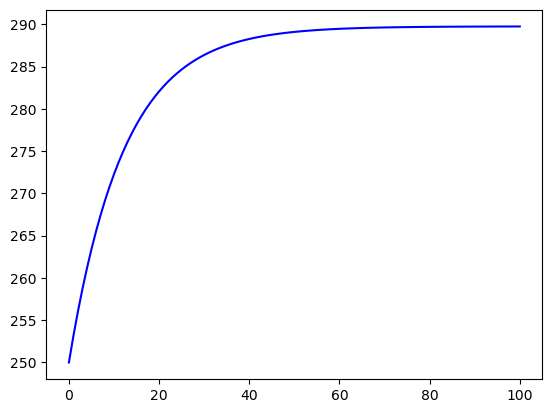

In [113]:
plt.figure()
plt.plot(time,T,'b')

2) write a simple code to integrate numerically the equation. Plot time series of the solution starting
from different initial conditions

Start with 7 different initial conditions and plot. Code below.

In [131]:
total_initials = 7
T=np.zeros((total_initials,total_time+1))
T[:,0] = [225,250,275,289,300,325,350]

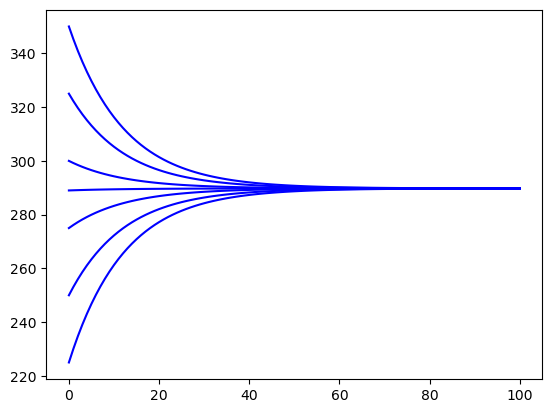

In [132]:
plt.figure()
for k in range(total_initials):
    for i in range(total_time):
        T[k,i+1] = T[k,i]-(T[k,i]-eq_temp)/tau_zero*1
    plt.plot(time,T[k,:],'b')

3) repeat 2) for a few different cases changing the equilibrium temperature and/or the relaxation time
scale, by tuning the appropriate parameters.

    - Change values of tau zero and eq_temp. Code below.

In [133]:
eq_temps = [250,350,0,500,120]

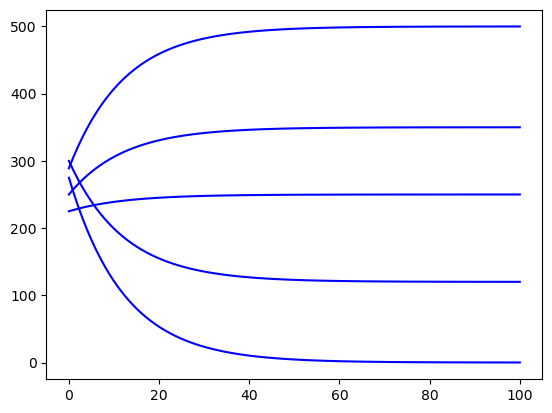

In [135]:
plt.figure()
for k in range(len(eq_temps)):
    for i in range(total_time):
        T[k,i+1] = T[k,i]-(T[k,i]-eq_temps[k])/tau_zero*1
    plt.plot(time,T[k,:],'b')

4) compute and plot the potential of the model for a few different cases

   a) The potential function is defined as the potential energy in the given equation. So if dT/dt = N(T), the potential is     defined as dV/dt = -N(T), the potential of the force, N(T), acting on T.

   b) Find the potential by integrating: V(T) = -integral (-infinity,T) N(T')dT'

   c) Similar to above, need to discretize the function. Rather than continuous integration, choose a maximum and minimum
    value and compute discrete steps, delta(T):
   
       - V(T) = -sum(Tmin,Tmax) N(T)delta(T)
   

In [147]:
#max, min, and number of points
x=np.linspace(200,400,1000)
#discretisation
dx=x[1]-x[0]

#V(T) = -sum(Tmin,Tmax) N(T)delta(T)
V=-np.cumsum(-(x-eq_temp)/tau_zero_seconds)*dx

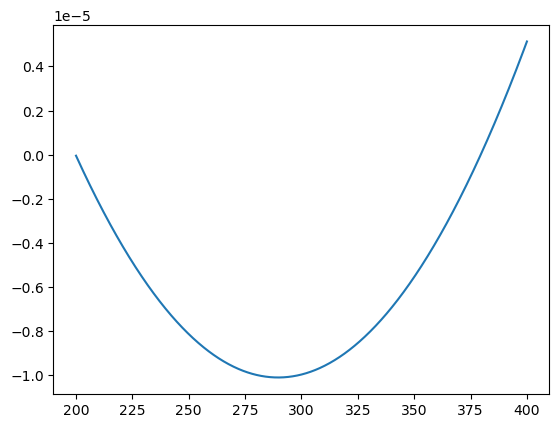

In [148]:
plt.figure()
plt.plot(x,V)

Exercise 2

Consider the Budyko Sellers model:

C(dT/dt) = S0/4(1-ap(T))-A-BT
where αp is a function of T as seen, and (with S2=-0.477).

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot).
2) write a code to integrate numerically the equation. Plot time series of the solution starting from different initial conditions for the cases you have shown in 1);
3) compute the potential for the cases considered in 1) and 2). How can you compute the numerical value of the equilibrium solution(s) without running the simulations?
   

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot).

   a) This function is slightly different than the one in Exercise 1 because albedo now depends on temperature, which is       more realistic. So I first define the albedo function as a sigmoid:
   - ap(T) = a_ice + (a_water-a_ice)/1+e^-((T-Tc)/delta(T))
   - Define variables and graph below

In [159]:
#typical values for albedo over ice and water
a_ice = 0.6
a_water = 0.3
#melting point of ice
Tc = 273
#temperature range of transition, will control abruptness of sigmoid graph
delta_T = 2
T = np.linspace(260, 290, 500)  # temperatures from 260K to 290K
#albedo as a function of temperature
albedo = a_ice + (a_water-a_ice)/(1 + np.exp(-(T-Tc)/delta_T))

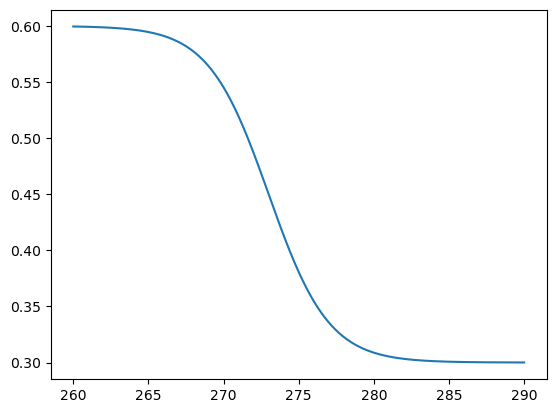

In [160]:
plt.plot(T,albedo)

1) for different values of S0, show graphically the existence (or not) of multiple solutions, by looking for zeros of the right hand side of the equation. Choose cases that give different behaviours (you can see the values of S0 to take form the hysteresis plot)

    a) C(dT/dt) = S0/4(1-ap(T))-A-BT gives the Budyko Sellers model. To get equilibrium points, we set the right hand side      to 0:
       - 0 = S0/4(1-ap(T))-A-BT
    b) Choose a range of values of T and plot to find equilibria (done in earlier code)
    c) Choose a range of values of initial condition S0 to see system state

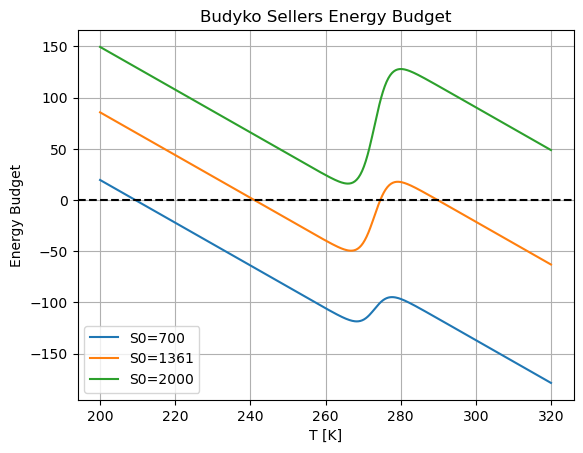

In [164]:
# Albedo function
def alpha_p(T):
    return a_ice + (a_water - a_ice) / (1 + np.exp(-(T-Tc)/delta_T))

#S0 values to test
S0_values = [700, 1361, 2000]

#plot 
for S0 in S0_values:
    fT = S0/4 * (1 - alpha_p(T)) - A - B*T
    plt.plot(T, fT, label=f"S0={S0}")

plt.axhline(0, color='k', linestyle='--')
plt.xlabel('T [K]')
plt.ylabel('Energy Budget')
plt.title('Budyko Sellers Energy Budget')
plt.legend()
plt.grid(True)
plt.show()


Graph shows local maxima and minima for each initial solar constant condition. An initial condition using the S0 that we currently have (1361 W/m^2) shows three equilibria, two stable and one unstable. An initial condition starting at 700 leads very quickly to snowball Earth conditions. An initial condition at 2000 never reaches an equilibrium, but shows a pattern of runaway warming where the system never stabilizes.

2) write a code to integrate numerically the equation. Plot time series of the solution starting from
different initial conditions for the cases you have shown in 1);

    a) Equation becomes:
       dT/dt = 1/C(S0/4(1-ap(T))-A-BT)